In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs
color_list = ['r', 'g', 'y', 'm']

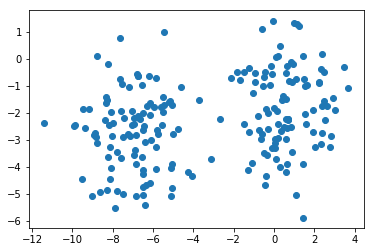

In [14]:
dataset = make_blobs(n_samples=200, n_features=2, centers=2, cluster_std=1.5)
data = dataset[0]
datax = data[:,0]
datay = data[:,1]
label = dataset[1]

plt.scatter(data[:,0], data[:,1])

In [15]:
def _distance(point1, point2):
    diff = point1 - point2 # difference between center and data point
    sqrd = np.square(diff) # elementwise squaring
    axis = 1 if len(sqrd.shape) == 2 else None
    sumd = np.sum(sqrd, axis=axis) # not summing all data. but only n_features,i.e. columns (axis = 1)
    sqrt = np.sqrt(sumd) # square root after sum
    return sqrt

In [16]:
# def classify_points(data, epsilon=1.0, min_points=5):
#     classes = []
#     for dat in data:
# #         print(dat)
#         dists = _distance(dat, data)
#         n_inside = np.count_nonzero(dists < epsilon) -1 # excluding the point(dat) itself
#         print(n_inside, end=' ')
#         if n_inside >= min_points:
#             classes.append(0)
#         else:
#             classes.append(1)
# #         print(n_inside>min_points)
# #         break
#     return np.array(classes)

# classify_points(data)

In [17]:
# cp = classify_points(data)
# print(cp)
# plt.scatter(data[:,0], data[:,1],
#             c=cp,
#             cmap=matplotlib.colors.ListedColormap(color_list))

In [18]:
core = 0
border = 1
noise = 2

In [19]:
base_data = data
distances = np.zeros((len(data), len(data)))

for i in range(len(base_data)-1):
    pt1 = base_data[i]
    dist = _distance(pt1, base_data[i+1:])
    distances[i, i+1:] = dist
    distances[i+1:, i] = dist

    
np.set_printoptions(precision=3)
print(distances)

[[ 0.     3.025  8.841 ...  3.48   2.67   6.017]
 [ 3.025  0.     8.346 ...  1.135  3.289  3.093]
 [ 8.841  8.346  0.    ...  9.454 11.044  9.912]
 ...
 [ 3.48   1.135  9.454 ...  0.     2.783  2.614]
 [ 2.67   3.289 11.044 ...  2.783  0.     5.207]
 [ 6.017  3.093  9.912 ...  2.614  5.207  0.   ]]


5 19 12 23 15 20 10 18 10 10 10 1 14 18 6 12 1 10 6 8 22 9 19 15 13 8 10 22 14 8 14 18 8 9 9 18 19 6 19 14 18 8 17 11 4 0 1 4 16 18 2 16 14 20 8 5 10 10 0 10 24 13 17 1 11 18 15 5 21 12 15 8 8 1 13 4 9 4 9 20 17 11 10 11 6 5 12 6 17 12 8 8 11 12 4 23 22 8 8 4 18 2 8 21 8 8 2 14 13 0 6 10 10 14 16 3 12 9 22 10 15 6 1 7 8 0 9 19 7 4 12 4 7 5 11 7 12 0 7 10 8 13 7 18 2 2 12 6 10 1 20 13 18 10 18 6 18 6 18 18 4 6 12 16 10 3 10 8 16 13 13 16 12 4 12 9 0 18 9 9 2 8 8 11 17 18 10 7 1 4 10 8 9 13 7 6 4 15 3 1 
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 2 2 2 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2
 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 2 0 0 0 0 2 0 0 2 0
 0 0 0 0 2 0 0 0 0 0 0 2 0 0 2 0 0 0 2 0 2 0 0 0 0 0 2 0 0 0 0 0 0 2 2 0 0
 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 2 0 0 0 2 0 0 0 0
 0 0 0 2 2 0 0 0 0 0 0 2 0 2 2]


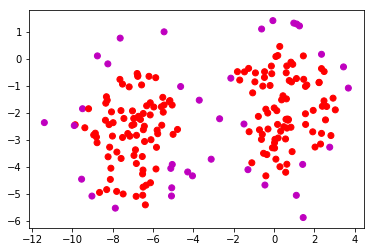

In [20]:
def classify_points(data, epsilon=1.0, min_points=5):
    classes = []
    for i, dat in enumerate(data):
        dists = distances[i]
        n_inside = np.count_nonzero(dists < epsilon) -1 # excluding the point(dat) itself
        print(n_inside, end=' ')
        if n_inside >= min_points:
            classes.append(core)
        else:
            classes.append(noise)
#         print(n_inside>min_points)
#         break
    return np.array(classes)

cp = classify_points(data)
print('\n',cp)
plt.scatter(data[:,0], data[:,1],
            c=cp,
            cmap=matplotlib.colors.ListedColormap(color_list))

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 2 2 1 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2
 0 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 2 0
 0 0 0 0 1 0 0 0 0 0 0 2 0 0 2 0 0 0 1 0 1 0 0 0 0 0 2 0 0 0 0 0 0 2 2 0 0
 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 2 0 0 0 1 0 0 0 0
 0 0 0 2 1 0 0 0 0 0 0 1 0 1 2]


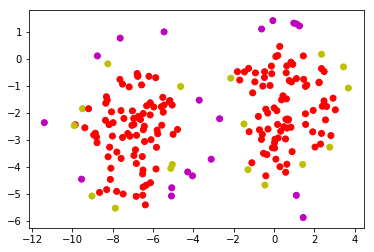

In [36]:
def classify_furthur(data, epsilon=1.0, min_points=5):
    global cp
    cpf = np.copy(cp)
    cls0 = data[cpf==0]
    for i in range(len(cp)):
        if cp[i] == 0: continue # ignore the core points
            
        dists = distances[i]
        datai = data[i]
        n_inside = np.count_nonzero(dists < epsilon)
        min_dist_pts = dists.argsort()[1:n_inside]
#         min_dist_pts = dists.argsort()[1:min_points+1]
#         print(min_dist_pts)
        for dat in data[min_dist_pts]:
            if dat in cls0:
                cpf[i] = border
                break
    return cpf
        
cpf = classify_furthur(data)
print(cpf)
plt.scatter(data[:,0], data[:,1],
            c=cpf,
            cmap=matplotlib.colors.ListedColormap(color_list))

In [37]:
cluster = np.zeros_like(cpf)

visited = []
def find_rechable_points(start_pt, epsilon=1.0, min_points=5):
    global cpf, data, visited
    if start_pt >= len(data):
        print(f'{start_pt} is above data size')
        return
    if cpf[start_pt] == noise:
        print(f'{start_pt} is a noise point')
        return
    if start_pt in visited:
        print(f'{start_pt} is already visited')
        return
    
    
    visited.append(start_pt)
    dists = distances[start_pt]
    n_inside = np.count_nonzero(dists < epsilon)
    min_dist_pts = dists.argsort()[1:n_inside]
    for pts in min_dist_pts:
        find_rechable_points(pts, epsilon, min_points)    

In [38]:
def find_unvisited_cluster_point():
    global cpf, data, cluster
    
    point = None
    for i in range(len(cpf)):
        if cluster[i] > 0:
            continue
        if cpf[i] == noise:
            continue
        point = i
    return point

In [39]:
find_unvisited_cluster_point()

198

In [41]:
visited = []
find_rechable_points(198)

133 is already visited
135 is already visited
182 is already visited
166 is already visited
194 is already visited
86 is already visited
86 is already visited
15 is already visited
190 is already visited
76 is already visited
117 is already visited
72 is already visited
117 is already visited
72 is already visited
71 is already visited
117 is already visited
76 is already visited
76 is already visited
117 is already visited
134 is already visited
90 is already visited
190 is already visited
134 is already visited
131 is already visited
77 is a noise point
8 is already visited
160 is a noise point
160 is a noise point
8 is already visited
77 is a noise point
76 is already visited
74 is already visited
3 is already visited
53 is already visited
79 is already visited
36 is already visited
88 is already visited
20 is already visited
68 is already visited
3 is already visited
36 is already visited
1 is already visited
20 is already visited
159 is already visited
95 is already visited
80 is 

In [42]:
visited = np.array(visited)
cluster[visited] = 1
visited

array([198, 133, 187, 135, 194, 182, 172, 166, 136,  86,  80,  15,  59,
       190, 134,  76, 117,  72,  71,   0,  90,   8, 131, 129,   9,  74,
       159,   3,  95,  79,  53,  22,  88,  36,   1,  20,  68, 127, 120,
        51, 197,  66,  39, 192, 105,  57,  32, 184, 143,  65, 177,  42,
       185,  35, 103, 151, 116, 171, 163,  70, 183, 155,  55, 119, 186,
       153, 146, 128, 157,  34, 124, 181,  98, 104,  21,  25, 101,  99,
        78,  44,  67,  75, 140,  33, 112,  17, 178,  14, 123,  94])

In [43]:
cluster

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0])

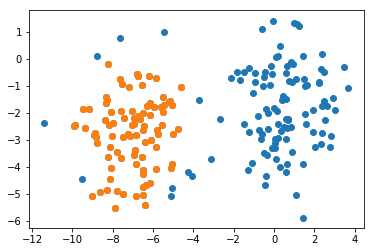

In [44]:
plt.scatter(data[:,0], data[:,1])
plt.scatter(data[visited][:,0], data[visited][:,1])

In [45]:
find_unvisited_cluster_point()

196

In [46]:
visited = []
find_rechable_points(196)

196 is already visited
195 is already visited
167 is already visited
92 is already visited
175 is already visited
179 is already visited
179 is already visited
41 is already visited
41 is already visited
41 is already visited
19 is already visited
41 is already visited
179 is already visited
167 is already visited
110 is already visited
138 is already visited
6 is already visited
191 is already visited
91 is already visited
19 is already visited
195 is already visited
191 is already visited
179 is already visited
138 is already visited
191 is already visited
179 is already visited
106 is already visited
84 is already visited
139 is already visited
84 is already visited
121 is already visited
26 is already visited
26 is already visited
102 is already visited
69 is already visited
162 is already visited
61 is already visited
12 is already visited
2 is already visited
81 is already visited
162 is already visited
193 is already visited
61 is already visited
121 is already visited
84 is alr

In [47]:
visited = np.array(visited)
cluster[visited] = 2

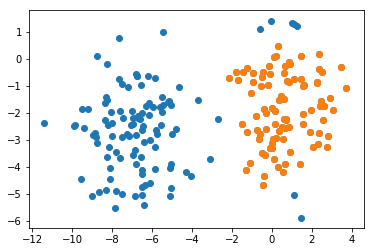

In [48]:
plt.scatter(data[:,0], data[:,1])
plt.scatter(data[visited][:,0], data[visited][:,1])

In [49]:
find_unvisited_cluster_point()

In [50]:
find_unvisited_cluster_point()

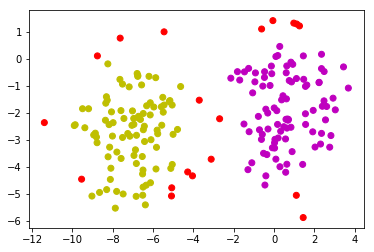

In [51]:
plt.scatter(data[:,0], data[:,1],
            c=cluster,
            cmap=matplotlib.colors.ListedColormap(color_list))